Leetcode Scrapper

In [6]:
import requests

def get_html(url, method='GET', data=None):
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Referer': 'https://www.google.com/',
        'Connection': 'keep-alive'
    }
    try:
        if method.upper() == 'POST':
            response = session.post(url, headers=headers, data=data)
        else:
            response = session.get(url, headers=headers)
        
        response.raise_for_status()  # Vérifie si la requête a réussi (status code 200)
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête {method}: {e}")
        return None

url = "https://leetcode.com/contest/biweekly-contest-136/"
html_content = get_html(url)

if html_content:
    print(html_content)  
else:
    print("Impossible de récupérer le contenu HTML de la page.")

Erreur lors de la requête GET: 403 Client Error: Forbidden for url: https://leetcode.com/contest/biweekly-contest-136/
Impossible de récupérer le contenu HTML de la page.


In [1]:
labels = [
            "Circle",
            "Square",
            "Triangle",
            "RegularPolygon(5)",
            "RegularPolygon(6)",
            "Star",
            "Ellipse",
            "Rectangle",
            "Line",
            "Arrow",
            "Arc",
            "AnnularSector",
            "Brace",
            "Polygon",
            "RoundedRectangle",
            "Cross",
            "CurvedArrow",
            "DoubleArrow",
            "VGroup (Circle, Square)",
            "VGroup (Triangle, Square)",
            "VGroup (Rectangle, Ellipse)",
            "VGroup (Line, Arrow)",
            "VGroup (Star, RegularPolygon(7))",
            "DashedLine",
            "NumberPlane",
            "Axes",
            "ThreeDAxes",
            "Surface",
            "Sphere",
            "Cube",
            "Cone",
            "Cylinder",
            "Torus",
            "Dot",
            "Vector",
            "Matrix",
            "DecimalNumber",
            "Integer",
            "LabeledDot",
            "BraceLabel",
            "Line (with tip)",
            "DashedVMobject",
            "VMobject",
            "FunctionGraph",
            "ImplicitFunction",
            "Arrow3D",
            "Annulus",
            "Angle",
            "Sector",
            "ParametricFunction",
            "ArcBetweenPoints",
            "CurvedDoubleArrow",
            "RoundedRectangle (corner_radius=0.5, height=2, width=3)",
            "Arc (start_angle=0, angle=PI)",
            "Arc (radius=1, start_angle=PI/2, angle=PI)",
            "Ellipse (width=2, height=1)",
            "Rectangle (height=2, width=3, color=BLUE)",
            "ArcBetweenPoints (angle=PI/2)",
            "Circle (radius=0.5)",
            "Square (side_length=0.5)",
            "Triangle (scaled)",
            "Star (scaled)",
            "Ellipse (width=1, height=0.5)",
            "Rectangle (height=1, width=1.5)",
            "Line (start=ORIGIN, end=RIGHT)",
            "Arrow (start=ORIGIN, end=RIGHT)",
            "Vector (RIGHT)",
            "DoubleArrow (ORIGIN, RIGHT, buff=0.1)"
        ]
print(len(labels))

68


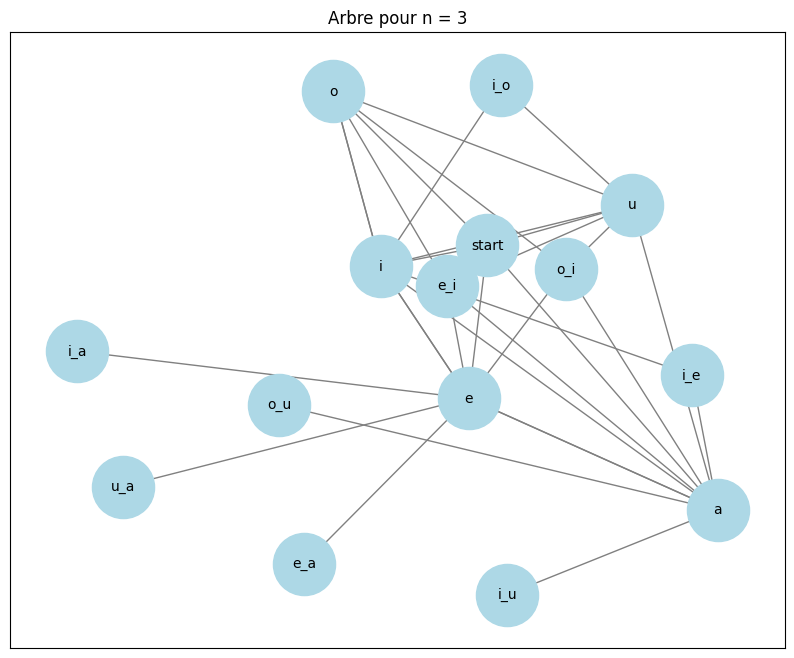

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ('start', 'a'), ('start', 'e'), ('start', 'i'), ('start', 'o'), ('start', 'u'),
    ('a', 'e'),
    ('e', 'a'), ('e', 'i'),
    ('i', 'a'), ('i', 'e'), ('i', 'o'), ('i', 'u'),
    ('o', 'i'), ('o', 'u'),
    ('u', 'a'),
    ('e_a', 'e'), ('e_i', 'a'), ('e_i', 'e'), ('e_i', 'o'), ('e_i', 'u'),
    ('i_a', 'e'), ('i_e', 'a'), ('i_e', 'i'), ('i_o', 'i'), ('i_o', 'u'), ('i_u', 'a'),
    ('o_i', 'a'), ('o_i', 'e'), ('o_i', 'o'), ('o_i', 'u'), ('o_u', 'a'),
    ('u_a', 'e')
]

second_level_labels = {
    'a': 'a', 'e': 'e', 'i': 'i', 'o': 'o', 'u': 'u',
    'e_a': 'e→a', 'e_i': 'e→i', 'i_a': 'i→a', 'i_e': 'i→e', 'i_o': 'i→o', 'i_u': 'i→u',
    'o_i': 'o→i', 'o_u': 'o→u', 'u_a': 'u→a'
}
for edge in edges:
    G.add_edge(edge[0], edge[1])
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Arbre pour n = 3")
plt.show()


In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data
x = np.linspace(-10, 10, 1000).reshape(-1, 1)  # 1000 data points
y = 2 * np.sin(x) + np.cos(x) + np.random.uniform(-0.1, 0.1, size=x.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an MLPRegressor model with random parameters
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', 
                   alpha=0.001, learning_rate='adaptive', max_iter=100, random_state=42)

# Train the model
mlp.fit(X_train, y_train.ravel())

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.882903184557841


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from geopy.distance import geodesic

# Define central coordinates for regions and production sites (latitude, longitude)
coordinates = {
    "Auvergne-Rhône-Alpes": (45.758, 4.841),  # Lyon (as central point)
    "Grand Est": (48.5796, 7.7518),  # Strasbourg
    "Centre-Val de Loire": (47.7516, 1.6751),  # Orléans
    "Bretagne": (48.1173, -1.6778),  # Rennes
    "Île-de-France": (48.8566, 2.3522),  # Paris
    "Occitanie": (43.6045, 1.4442),  # Toulouse
    "Normandie": (49.1829, -0.3707),  # Caen
    "Nouvelle-Aquitaine": (44.8378, -0.5792),  # Bordeaux
    "Hauts-de-France": (50.6292, 3.0573),  # Lille
    "Bourgogne-Franche-Comté": (47.322, 5.0415),  # Dijon
    "Pays de la Loire": (47.2184, -1.5536),  # Nantes
    "Provence-Alpes-Côte d'Azur": (43.2965, 5.3698),  # Marseille
    "Angers": (47.4784, -0.5632),
    "Toulouse": (43.6045, 1.4442),
    "Ecully": (45.7746, 4.8044),
    "Saint-Etienne": (45.4397, 4.3872)
}

# Function to calculate distance between two locations
def calculate_distance(loc1, loc2):
    return round(geodesic(loc1, loc2).kilometers, 2)

# Calculate distances and populate the dataframe
for region in distance_df.index:
    for site in production_sites:
        distance_df.loc[region, site] = calculate_distance(coordinates[region], coordinates[site])

# Save the updated distances to an Excel file
updated_output_file = '/mnt/data/region_to_usine_distances_filled.xlsx'
distance_df.to_excel(updated_output_file)

updated_output_file


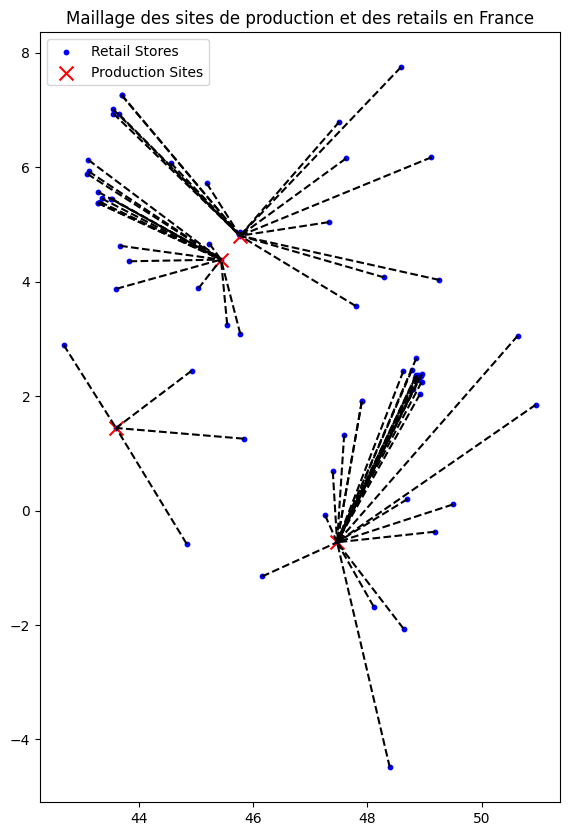

In [43]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

retail_stores = [
    "Levallois", "Evry", "Hyeres", "Marseille 3", "Saumur", "Lyon 2", "Metz", "Vesoul", "Tours", 
    "Strasbourg", "Lyon 3", "Aix en provence 1", "Toulon", "Marseille 13", "Aurillac", "Paris 14", 
    "Saint-denis", "Issoire", "Montbéliard", "Villeurbanne", "Nice", "Aubagne", "Marne la vallée", 
    "Perpignan", "Lille", "Orléans 1", "Nice 2", "Limoges", "Gap", "Nïmes", "Avignon", "Toulouse", 
    "Grasse", "Saint-Etienne", "Le puy en velais", "Calais", "Paris 19", "Aix en provence 2", 
    "Annonay", "Nanterre", "Evreux", "Bordeaux", "Montpellier", "Chambourcy", "La Rochelle", 
    "Ecully", "Paris 12", "Dijon", "La Seyne sur mer", "Lyon 4", "Auxerre", "Stains", "Orléans 2", 
    "Clermont-Ferrand", "Caen", "Creteil", "Brest", "Marseille 2", "Angers", "Grenoble", "Troyes", 
    "Marseille 7", "Arles", "Argenteuil", "Reims", "Le Havre", "Paris 17", "Dinart", "Blois", 
    "Rennes", "Versailles", "Mandelieue"
]

production_sites = ["Angers", "Toulouse", "Ecully", "Saint-Etienne"]

retail_df = pd.DataFrame(retail_stores, columns=["City"])
production_df = pd.DataFrame(production_sites, columns=["City"])

retail_coords = [
    (48.893, 2.288), (48.629, 2.441), (43.120, 6.128), (43.322, 5.396), (47.259, -0.081),
    (45.760, 4.836), (49.120, 6.175), (47.625, 6.155), (47.394, 0.684), (48.584, 7.748),
    (45.757, 4.834), (43.529, 5.448), (43.125, 5.929), (43.351, 5.455), (44.926, 2.444),
    (48.835, 2.322), (48.935, 2.359), (45.547, 3.249), (47.511, 6.799), (45.771, 4.877),
    (43.703, 7.256), (43.295, 5.568), (48.857, 2.668), (42.688, 2.894), (50.631, 3.059),
    (47.902, 1.909), (43.699, 7.269), (45.835, 1.257), (44.558, 6.079), (43.838, 4.357),
    (43.604, 1.444), (43.659, 6.923), (45.439, 4.387), (45.043, 3.882), (50.949, 1.854),
    (48.876, 2.363), (43.521, 5.446), (45.236, 4.666), (48.700, 0.201), (44.837, -0.579),
    (43.611, 3.877), (48.918, 2.033), (46.158, -1.151), (45.771, 4.804), (48.853, 2.373),
    (47.322, 5.041), (43.102, 5.884), (45.767, 4.828), (47.798, 3.574), (48.953, 2.385),
    (47.902, 1.909), (45.777, 3.085), (49.182, -0.369), (48.777, 2.453), (48.390, -4.486),
    (43.280, 5.376), (47.469, -0.554), (45.188, 5.722), (48.297, 4.074), (43.287, 5.378),
    (43.673, 4.628), (48.947, 2.248), (49.258, 4.031), (49.494, 0.107), (48.884, 2.329),
    (48.632, -2.065), (47.593, 1.329), (48.109, -1.678), (48.804, 2.120), (43.557, 6.938)
]

production_coords = [
    (47.469, -0.554), (43.604, 1.444), (45.771, 4.804), (45.439, 4.387)
]

extra_coords = [(48.856, 2.352), (43.550, 7.017)]

retail_coords += extra_coords

retail_df['Coordinates'] = retail_coords

retail_gdf = gpd.GeoDataFrame(retail_df, geometry=[Point(xy) for xy in retail_coords], crs="EPSG:4326")
production_gdf = gpd.GeoDataFrame(production_df, geometry=[Point(xy) for xy in production_coords], crs="EPSG:4326")

tree = KDTree(production_coords)
distances, indices = tree.query(retail_coords)

fig, ax = plt.subplots(figsize=(10, 10))
base = retail_gdf.plot(ax=ax, color='blue', marker='o', markersize=10, label='Retail Stores')
production_gdf.plot(ax=ax, color='red', marker='x', markersize=100, label='Production Sites')

for i, retail_point in enumerate(retail_gdf.geometry):
    nearest_production_point = production_gdf.geometry.iloc[indices[i]]
    ax.plot([retail_point.x, nearest_production_point.x], [retail_point.y, nearest_production_point.y], color="black", linestyle="--")

plt.title("Maillage des sites de production et des retails en France")
plt.legend()
plt.show()


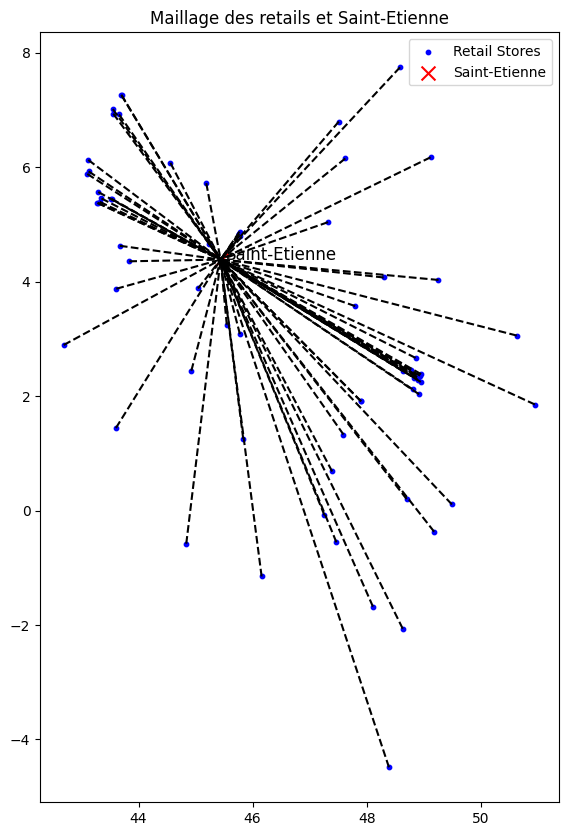

In [2]:
# Modifying the code to only show Saint-Etienne as the production site, with a label for Saint-Etienne

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

retail_stores = [
    "Levallois", "Evry", "Hyeres", "Marseille 3", "Saumur", "Lyon 2", "Metz", "Vesoul", "Tours", 
    "Strasbourg", "Lyon 3", "Aix en provence 1", "Toulon", "Marseille 13", "Aurillac", "Paris 14", 
    "Saint-denis", "Issoire", "Montbéliard", "Villeurbanne", "Nice", "Aubagne", "Marne la vallée", 
    "Perpignan", "Lille", "Orléans 1", "Nice 2", "Limoges", "Gap", "Nïmes", "Avignon", "Toulouse", 
    "Grasse", "Saint-Etienne", "Le puy en velais", "Calais", "Paris 19", "Aix en provence 2", 
    "Annonay", "Nanterre", "Evreux", "Bordeaux", "Montpellier", "Chambourcy", "La Rochelle", 
    "Ecully", "Paris 12", "Dijon", "La Seyne sur mer", "Lyon 4", "Auxerre", "Stains", "Orléans 2", 
    "Clermont-Ferrand", "Caen", "Creteil", "Brest", "Marseille 2", "Angers", "Grenoble", "Troyes", 
    "Marseille 7", "Arles", "Argenteuil", "Reims", "Le Havre", "Paris 17", "Dinart", "Blois", 
    "Rennes", "Versailles", "Mandelieue"
]

production_sites = ["Saint-Etienne"]

retail_df = pd.DataFrame(retail_stores, columns=["City"])
production_df = pd.DataFrame(production_sites, columns=["City"])

retail_coords = [
    (48.893, 2.288), (48.629, 2.441), (43.120, 6.128), (43.322, 5.396), (47.259, -0.081),
    (45.760, 4.836), (49.120, 6.175), (47.625, 6.155), (47.394, 0.684), (48.584, 7.748),
    (45.757, 4.834), (43.529, 5.448), (43.125, 5.929), (43.351, 5.455), (44.926, 2.444),
    (48.835, 2.322), (48.935, 2.359), (45.547, 3.249), (47.511, 6.799), (45.771, 4.877),
    (43.703, 7.256), (43.295, 5.568), (48.857, 2.668), (42.688, 2.894), (50.631, 3.059),
    (47.902, 1.909), (43.699, 7.269), (45.835, 1.257), (44.558, 6.079), (43.838, 4.357),
    (43.604, 1.444), (43.659, 6.923), (45.439, 4.387), (45.043, 3.882), (50.949, 1.854),
    (48.876, 2.363), (43.521, 5.446), (45.236, 4.666), (48.700, 0.201), (44.837, -0.579),
    (43.611, 3.877), (48.918, 2.033), (46.158, -1.151), (45.771, 4.804), (48.853, 2.373),
    (47.322, 5.041), (43.102, 5.884), (45.767, 4.828), (47.798, 3.574), (48.953, 2.385),
    (47.902, 1.909), (45.777, 3.085), (49.182, -0.369), (48.777, 2.453), (48.390, -4.486),
    (43.280, 5.376), (47.469, -0.554), (45.188, 5.722), (48.297, 4.074), (43.287, 5.378),
    (43.673, 4.628), (48.947, 2.248), (49.258, 4.031), (49.494, 0.107), (48.884, 2.329),
    (48.632, -2.065), (47.593, 1.329), (48.109, -1.678), (48.804, 2.120), (43.557, 6.938)
]

production_coords = [(45.439, 4.387)]

extra_coords = [(48.856, 2.352), (43.550, 7.017)]

retail_coords += extra_coords

retail_df['Coordinates'] = retail_coords

retail_gdf = gpd.GeoDataFrame(retail_df, geometry=[Point(xy) for xy in retail_coords], crs="EPSG:4326")
production_gdf = gpd.GeoDataFrame(production_df, geometry=[Point(xy) for xy in production_coords], crs="EPSG:4326")

tree = KDTree(production_coords)
distances, indices = tree.query(retail_coords)

fig, ax = plt.subplots(figsize=(10, 10))
base = retail_gdf.plot(ax=ax, color='blue', marker='o', markersize=10, label='Retail Stores')
production_gdf.plot(ax=ax, color='red', marker='x', markersize=100, label='Saint-Etienne')

for i, retail_point in enumerate(retail_gdf.geometry):
    nearest_production_point = production_gdf.geometry.iloc[indices[i]]
    ax.plot([retail_point.x, nearest_production_point.x], [retail_point.y, nearest_production_point.y], color="black", linestyle="--")

for x, y, label in zip(production_gdf.geometry.x, production_gdf.geometry.y, production_df['City']):
    ax.text(x + 0.1, y, label, fontsize=12)

plt.title("Maillage des retails et Saint-Etienne")
plt.legend()
plt.show()


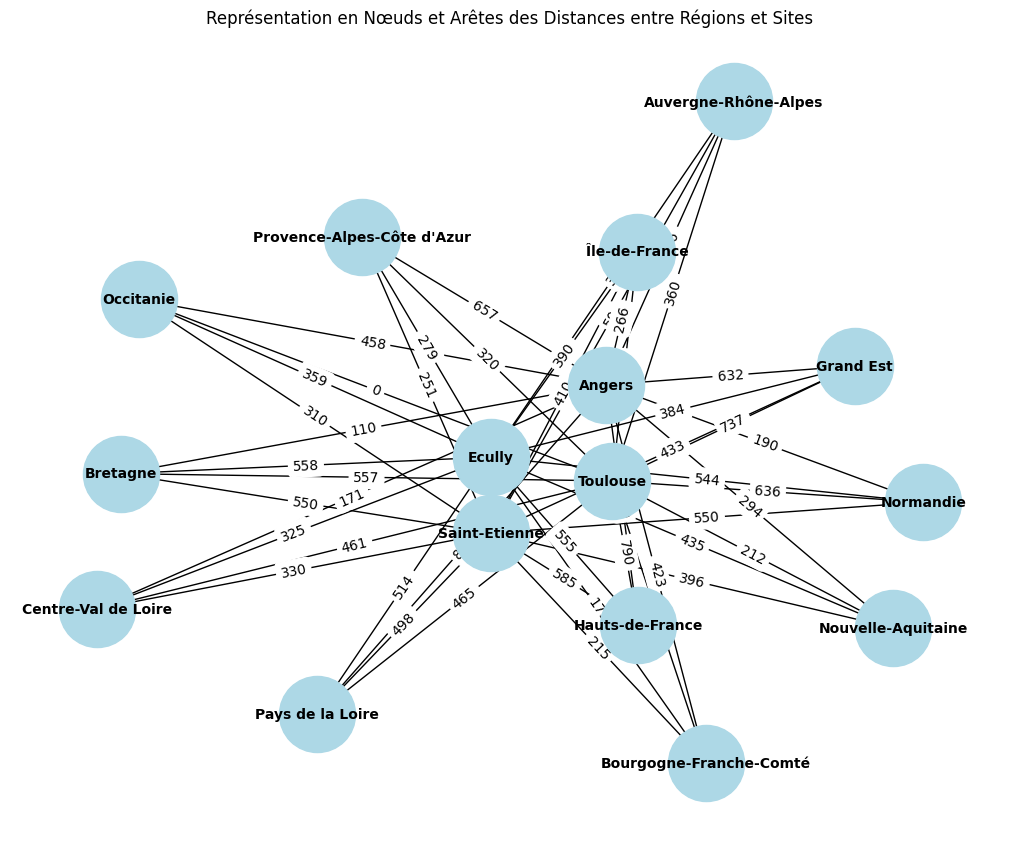

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Données extraites du tableau
data = {
    "Regions": [
        "Auvergne-Rhône-Alpes", "Grand Est", "Centre-Val de Loire", "Bretagne", "Île-de-France", "Occitanie",
        "Normandie", "Nouvelle-Aquitaine", "Hauts-de-France", "Bourgogne-Franche-Comté", "Pays de la Loire",
        "Provence-Alpes-Côte d'Azur"
    ],
    "Angers": [456, 632, 171, 110, 266, 458, 190, 294, 439, 423, 80, 657],
    "Toulouse": [360, 737, 461, 557, 588, 0, 636, 212, 790, 500, 465, 320],
    "Ecully": [3, 384, 325, 558, 390, 359, 544, 435, 555, 173, 514, 279],
    "Saint-Etienne": [50, 433, 330, 550, 410, 310, 550, 396, 585, 215, 498, 251],
    "Average": [217, 546, 322, 444, 413, 282, 480, 334, 593, 328, 389, 377],
    "Min": [30, 384, 171, 110, 266, 30, 190, 212, 439, 173, 80, 251]
}

# Create a dataframe
df = pd.DataFrame(data)

# Construction d'un graphe en nœuds et arêtes
G = nx.Graph()

# Ajouter les régions et les sites comme nœuds
sites = ['Angers', 'Toulouse', 'Ecully', 'Saint-Etienne']
for region in df['Regions']:
    G.add_node(region)

for site in sites:
    G.add_node(site)

# Ajouter des arêtes pondérées
for index, row in df.iterrows():
    for site in sites:
        G.add_edge(row['Regions'], site, weight=row[site])

# Générer une visualisation du graphe
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout pour mieux organiser le graphe
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

plt.title('Représentation en Nœuds et Arêtes des Distances entre Régions et Sites')
plt.show()
